In [1]:
from opr_structs import *
from opr_logic import *
from pprint import pprint
import copy

In [2]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")
logger.setLevel(logging.WARNING)

DEBUG:root:test


In [3]:
from contextlib import contextmanager

@contextmanager
def loggingcm(level=logging.DEBUG):
    # Code to acquire resource, e.g.:
    logger.setLevel(level)
    try:
        yield
    finally:
        # Code to release resource, e.g.:
        logger.setLevel(logging.WARNING)

with loggingcm():
    logger.debug("debug1")
logger.debug("debug2")

DEBUG:root:debug1


In [4]:
hand_weapon = Weapon(1)

champion_hand_weapon = Weapon(3, {"AP": 1})
dual_hand_weapon = Weapon(2)
fire_rifle = Weapon(2, {"Range": 18, "Rending": 0})
rifle = Weapon(1, {"Range": 18, "AP": 1})
crossbow = Weapon(1, {"Range": 24, "Rending": 0})

In [5]:
claw = Weapon(10)
stomp = Weapon(4, {"AP": 1})
giant_beast = Model(4, 3, [claw, stomp], rules={"Fear":2, "Regeneration":True, "Tough":12})
giant_beast_u = Unit([giant_beast], 1, name="Giant Beast")

In [6]:
import tqdm
def mc(func, times=10000):
    results = []
    for i in tqdm.tqdm(range(times)):
        results.append(func())
    return sum(results) / len(results)

In [7]:
def to_the_death(a, b):
    #pick a starter
    # A attacks b, b attacks a
    # until all dead
    
    first = a
    second = b
    
    # TODO add a shooting phase, start them 24" away from each other
    
    while True:
        # reset fatigued
        if "Fatigued" in a.rules:
            del a.rules["Fatigued"]
        if "Fatigued" in b.rules:
            del b.rules["Fatigued"]
        
        logger.debug("First melee")
        if "Wavering" not in first.rules:
            do_melee(first, second)
        else:
            del first.rules["Wavering"]
        if not a.alive:
            return 0
        if not b.alive:
            return 1
        
        logger.debug("Second melee")
        if "Wavering" not in second.rules:
            do_melee(second, first)
        else:
            del second.rules["Wavering"]
        if not a.alive:
            return 0
        if not b.alive:
            return 1

In [8]:
hand_weapon = Weapon(1)
halberd = Weapon(1, {"Rending": 0})
spear = Weapon(1, {"Counter": True})
dwarf_warrior = Model(4, 5, [hand_weapon], rules={"Shield Wall":0, "Slow":0})
warriors = Unit(models_for(dwarf_warrior, 20), 5, name="Warriors")
warriors_10 = Unit(models_for(dwarf_warrior, 10), 5, name="Warriors")
dwarf_halb = Model(4, 5, [halberd], rules={"Shield Wall":0, "Slow":0})
halb_warrs = Unit(models_for(dwarf_halb, 20), 5, name="Warriors")
dwarf_spear = Model(4, 5, [spear], rules={"Shield Wall":0, "Slow":0})
spear_warrs = Unit(models_for(dwarf_spear, 20), 5, name="Warriors")

In [9]:
heavy_hand_weapon = Weapon(1, {"AP": 1})
veteran = Model(3, 4, [heavy_hand_weapon], rules={"Fearless":0, "Slow":0})
veterans = Unit(models_for(veteran, 10), 10, name="Veterans")
heavy_spear = Weapon(1, {"AP": 1, "Counter": True})
spear_vet = Model(3, 4, [heavy_spear], rules={"Fearless":0, "Slow":0})
spear_vets = Unit(models_for(spear_vet, 10), 10, name="Spear Veterans")
veterans_3 = Unit(models_for(veteran, 15), 10, name="Veterans")


In [10]:
berserker = Model(4, 5, [dual_hand_weapon], rules={"Fearless":True, "Furious":True, "Slayer":True, "Slow":True})
berserkers = Unit(models_for(berserker, 10), 5, name="Berserkers")

In [11]:
rune_weapon = Weapon(1, {"Rending": 0})
iron_warrior = Model(3, 3, [rune_weapon], rules={"Shield Wall":True, "Slow":True})
iron_warriors = Unit(models_for(iron_warrior, 10), 5, name="Iron Warriors")
iron_warriors_5 = Unit(models_for(iron_warrior, 5), 5, name="Iron Warriors")

In [12]:
great_weapon = Weapon(2, {"AP": 2})
hammerer = Model(3, 4, [great_weapon], rules={"Slow":0})
hammerers = Unit(models_for(hammerer, 10), 5, name="Hammerers")

In [13]:
great_weapons = Weapon(6, {"AP": 2})
stomp = Weapon(4, {"AP": 1})
giant_construct = Model(3, 2, [great_weapons, stomp], rules={"Fear":2, "Slow":True, "Tough":12})
giant_construct_u = Unit([giant_construct], 1, name="Giant Construct")

In [14]:
stone_fists = Weapon(3, {"AP": 1})
golem = Model(4, 5, [stone_fists], rules={"Tough":3, "Slow":0})
golems = Unit(models_for(golem, 3), 3, name="Golems")
golems_c = Unit(models_for(golem, 6), 3, name="Golems")

In [15]:
# chivalrous kingdoms
throw_stones = Weapon(1, {"Range": 12})
peasant = Model(6, 6, [hand_weapon, throw_stones], rules={})
peasants = Unit(models_for(peasant, 20), 5, name="Peasants")

man_at_arms = Model(5, 5, [hand_weapon], rules={})
men_at_arms = Unit(models_for(man_at_arms, 20), 5, name="Men-At-Arms")
men_at_arms_10 = Unit(models_for(man_at_arms, 10), 5, name="Men-At-Arms")

longbow = Weapon(1, {"Range": 30})
longbowman = Model(5, 5, [hand_weapon, longbow], rules={})
longbowmen = Unit(models_for(longbowman, 5), 5, name="Longbowmen")
longbowmen_10 = Unit(models_for(longbowman, 10), 5, name="Longbowmen")

foot_knight = Model(4, 4, [heavy_hand_weapon], rules={"Fearless":True})
foot_knights = Unit(models_for(foot_knight, 10), 5, name="Foot Knights")
foot_knights_5 = Unit(models_for(foot_knight, 5), 5, name="Foot Knights")
heavy_great_weapon = Weapon(1, {"AP": 3})
heavy_foot_knight = Model(4, 4, [heavy_great_weapon], rules={"Fearless":True})
heavy_foot_knights = Unit(models_for(heavy_foot_knight, 10), 5, name="Heavy Foot Knights")
heavy_foot_knights_5 = Unit(models_for(heavy_foot_knight, 5), 5, name="Heavy Foot Knights")

lance = Weapon(1, {"Lance": True})
realm_knight = Model(4, 4, [lance], rules={"Fast": True, "Fearless": True, "Furious": True, "Impact": 1, "Joust": True})
realm_knights = Unit(models_for(realm_knight, 5), 5, name="Realm Knights")
realm_knights_c = Unit(models_for(realm_knight, 10), 5, name="Realm Knights")

heavy_lance = Weapon(1, {"Lance": True, "AP": 1})
grail_knight = Model(4, 4, [lance], rules={"Fast": True, "Fearless": True, "Impact": 1, "Joust": True})
grail_knights = Unit(models_for(grail_knight, 5), 5, name="Grail Knights")
grail_knights_c = Unit(models_for(grail_knight, 10), 5, name="Grail Knights")

In [16]:
goblin_warrior = Model(5, 6, [hand_weapon], rules={})
goblin_warriors = Unit(models_for(goblin_warrior, 20), 5, name="Gobbos")

In [17]:
giant_club = Weapon(6, {"AP": 2})
stomp = Weapon(4, {"AP": 1})
giant = Model(4, 3, [giant_club, stomp], rules={"Fear":2, "Slow":True, "Tough":12})
giant_u = Unit([giant], 1, name="Giant")

heavy_hand_weapons = Weapon(2, {"AP": 1})
ogre = Model(4, 4, [heavy_hand_weapons], rules={"Tough":3})
ogres = Unit(models_for(ogre, 6), 3, name="Ogres")
ogres_3 = Unit(models_for(ogre, 3), 3, name="Ogres")

In [18]:
giant_beast_u, giant_construct_u, giant_u
a = peasants
b = warriors
with loggingcm(): to_the_death(copy.deepcopy(b), copy.deepcopy(a))

DEBUG:root:First melee
DEBUG:opr_logic:Unit(Warriors (20/20)(0.0,0.0) strikes Unit(Peasants (20/20)(0.0,0.0)
DEBUG:opr_logic:10 attacks
DEBUG:opr_logic:6 hits
DEBUG:opr_logic:5 wounds
DEBUG:opr_logic:Unit(Peasants (15/20)(0.0,0.0) strikes Unit(Warriors f(20/20)(0.0,0.0)
DEBUG:opr_logic:10 attacks
DEBUG:opr_logic:3 hits
DEBUG:opr_logic:1 wounds
DEBUG:opr_logic:scores: a: 8, d: 4
DEBUG:opr_structs:Peasants doing morale test
DEBUG:opr_structs:Peasants failed morale test
DEBUG:root:Second melee
DEBUG:root:First melee
DEBUG:opr_logic:Unit(Warriors (19/20)(0.0,0.0) strikes Unit(Peasants (15/20)(0.0,0.0)
DEBUG:opr_logic:10 attacks
DEBUG:opr_logic:4 hits
DEBUG:opr_logic:3 wounds
DEBUG:opr_logic:Unit(Peasants (12/20)(0.0,0.0) strikes Unit(Warriors f(19/20)(0.0,0.0)
DEBUG:opr_logic:10 attacks
DEBUG:opr_logic:1 hits
DEBUG:opr_logic:0 wounds
DEBUG:opr_logic:scores: a: 6, d: 2
DEBUG:opr_structs:Peasants doing morale test
DEBUG:opr_structs:Peasants failed morale test
DEBUG:root:Second melee
DEBUG:ro

In [19]:
# a_first = mc(lambda: to_the_death(copy.deepcopy(a), copy.deepcopy(b)), times=10000)
# b_first = 1 - mc(lambda: to_the_death(copy.deepcopy(b), copy.deepcopy(a)), times=10000)
# (a_first + b_first) / 2, a_first, b_first

In [20]:
# def mc_many

Without slayer: 0.018
With slayer: 0.17
berserkers: (0.3737, 0.15859999999999996, 0.26615)
with fearless: (0.3871, 0.16779999999999995, 0.27745)
Iron Warriors: 0.367
Iron Warriors with sw: 0.754 - both first = 0.50 (0.7476, 0.688, 0.7178)
Hammerers: 0.503 - both: (0.505, 0.2532, 0.3791)

vs giant construct: 
warriors vs giant construct: (0.003699999999999984, 0.0061, 0.0012999999999999678)
rending warriors: (0.14500000000000002, 0.1772, 0.11280000000000001)
counter warriors: (0.0030500000000000227, 0.0045, 0.0016000000000000458)
veterans vs giant construct: (0.0013999999999999724, 0.0023, 0.0004999999999999449)
Berserkers vs giant construct: (0.22865, 0.3642, 0.09309999999999996)
Hammerers vs giant construct: (0.2149, 0.3515, 0.07830000000000004)
Iron warriors vs giant construct: (0.0736, 0.0979, 0.04930000000000001)
spear_vets: (0.0020499999999999954, 0.002, 0.0020999999999999908)
veterans_3: (0.03749999999999998, 0.0584, 0.016599999999999948)

vs warriors:
warriors: (0.5018499999999999, 0.5678, 0.43589999999999995)
halb_warrs: (0.7605, 0.8168, 0.7041999999999999)
spear_warrs: (0.5393, 0.5854, 0.49319999999999997)
Veterans: (0.12745, 0.1848, 0.07010000000000005)
berserkers: (0.35650000000000004, 0.4711, 0.2419)
iron_warriors: (0.84885, 0.8907, 0.8069999999999999)
hammerers: (0.8624499999999999, 0.9642, 0.7606999999999999)
golems: (0.007200000000000018, 0.0107, 0.0037000000000000366)
golems_c: (0.6537999999999999, 0.7632, 0.5444)
peasants: (0.0003, 0.0006, 0.0)
men_at_arms: (0.05234999999999998, 0.0711, 0.03359999999999996)
foot_knights: (0.04919999999999997, 0.0717, 0.026699999999999946)
realm_knights: (0.02479999999999999, 0.0383, 0.011299999999999977)
realm_knights_c: (0.6936, 0.8551, 0.5321)
spear_vets: (0.19534999999999997, 0.2129, 0.17779999999999996)
veterans_3: (0.78435, 0.8921, 0.6766)

vs veterans:
men_at_arms: (0.40115, 0.5128, 0.2895)
vs v3: 

vs Giant:
warriors: (0.15254999999999996, 0.1897, 0.11539999999999995)
veterans: (0.03445, 0.0548, 0.014100000000000001)
spear_vets: (0.06, 0.0605, 0.0595)
berserkers: (0.6508, 0.8216, 0.48)
iron_warriors: (0.33155, 0.395, 0.2681)
hammerers: (0.6374500000000001, 0.8328, 0.44210000000000005)
halb_warrs: (0.49119999999999997, 0.5519, 0.4305)

In [21]:
import matplotlib.pyplot as plt

def plot_items(ax, items, name_func):
    y = []
    x = []
    names = []
    for i in items:
        x.append(i.x)
        y.append(i.y)
        name = name_func(i) #f"{u.name} ({len(u.models)}/{u.starting_models})"
        names.append(name)
    
    ax.scatter(x, y)
    for i, n in enumerate(names):
        ax.annotate(n, (x[i], y[i]))

def plot_battle(battle, cursor_x=0, cursor_y=0):
    fig = plt.figure(figsize=(10,8))
    ax = fig.subplots()
    for p in battle.players:
        plot_items(ax, [u for u in p.units if u.alive], lambda u: f"{u.name} ({len(u.models)}/{u.starting_models})")
    
    plot_items(ax, battle.objectives, lambda o: f"{o.controller}")
    
    ax.scatter(cursor_x, cursor_y, c="red")
    ax.set_xlim([0, 72])
    ax.set_ylim([0, 48])
    
    
    plt.gca().set_aspect('equal')
    

    plt.show()

In [22]:
def full_1v1(a, b, draw_value=0.5):
    # deploy the units at 0,0 and 24, 0
    # put objective markers there too
    # run the main loop
    a.x = 12
    a.y = 12
    b.x = 12
    b.y = 36
    p1 = Player("p1", [a], (0, 12, 0, 72))
    p2 = Player("p2", [b], (36, 48, 0, 72))
    battle = Battle([p1, p2])
    battle.objectives = [Objective(12, 12),Objective(12, 36),]
    check_objectives(battle)
    
#     run_battle(battle)
    next_player = 0
    for i in range(4):
        next_player = do_round(battle, next_player)
        if logger.getEffectiveLevel() <= 10:
            plot_battle(battle)
            print("Units:")
            pprint(battle.all_units)
            pprint(battle.objectives)
        
    if p1.units[0].alive and p2.units[0].alive:
        return 0.5
    elif p1.units[0].alive:
        return 1
    else:
        return 0

In [23]:
rifle_dwarf = Model(4, 5, [rifle, hand_weapon], rules={"Slow":0})
rifle_dwarves = Unit(models_for(rifle_dwarf, 5), 5, name="Marksmen")
rifle_dwarves_c = Unit(models_for(rifle_dwarf, 10), 5, name="Marksmen")

xbow_dwarf = Model(4, 5, [crossbow, hand_weapon], rules={"Slow":0})
xbow_dwarves = Unit(models_for(xbow_dwarf, 5), 5, name="Marksmen")
xbow_dwarves_c = Unit(models_for(xbow_dwarf, 10), 5, name="Marksmen")

fire_rifle = Weapon(2, {"Range": 18, "Rending": 0})
drake_marksman = Model(3, 3, [fire_rifle, hand_weapon], rules={"Slow":0})
drake_marksmen = Unit(models_for(drake_marksman, 5), 5, name="Drakes")
drake_marksmen_c = Unit(models_for(drake_marksman, 10), 5, name="Drakes")

crew = Weapon(3)
bolt_thrower = Weapon(1, {"Range": 36, "AP": 3, "Deadly":6})
bolt_thrower_m = Model(4, 5, [crew, bolt_thrower], rules={"Immobile":0, "Entrenched":0, "Tough":3})
bolt_thrower_u = Unit([bolt_thrower_m], 1, name="Arty")

cannon = Weapon(2, {"Range": 30, "AP": 1, "Blast":3})
dwarven_cannon = Model(4, 5, [crew, cannon], rules={"Immobile":0, "Entrenched":0, "Tough":3})
dwarven_cannon_u = Unit([dwarven_cannon], 1, name="Arty")

DEBUG:opr_logic:Starting Round 1
DEBUG:opr_logic:executing Unit(Men-At-Arms (10/10)(12.0,12.0), ('Rush', 12, 3.141592653589793)
DEBUG:opr_logic:executing Unit(Foot Knights (5/5)(12.0,36.0), ('Charge', Unit(Men-At-Arms a(10/10)(12.0,24.0))
DEBUG:opr_logic:Unit(Foot Knights a(5/5)(12.0,26.0) strikes Unit(Men-At-Arms a(10/10)(12.0,24.0)
DEBUG:opr_logic:5 attacks
DEBUG:opr_logic:2 hits
DEBUG:opr_logic:2 wounds
DEBUG:opr_logic:Unit(Men-At-Arms a(8/10)(12.0,24.0) strikes Unit(Foot Knights fa(5/5)(12.0,26.0)
DEBUG:opr_logic:8 attacks
DEBUG:opr_logic:2 hits
DEBUG:opr_logic:0 wounds
DEBUG:opr_logic:scores: a: 3, d: 1
DEBUG:opr_structs:Men-At-Arms doing morale test
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal n

DEBUG:matplotlib.font_manager:findfont: score(<Font 'D050000L' (D050000L.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Nastaliq Urdu' (NotoNastaliqUrdu-Bold.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Display' (NotoSansDisplay-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Display' (NotoSerifDisplay-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Display' (NotoSerifDisplay-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Adlam Unjoined' (NotoSansAdlamUnjoined-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'URW Gothic' (URWGothic-Book.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Lepcha

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu' (Ubuntu-R.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Khmer' (NotoSerifKhmer-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Gurmukhi' (NotoSerifGurmukhi-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Lao' (NotoSansLao-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Javanese' (NotoSansJavanese-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Telugu UI' (NotoSansTeluguUI-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Syloti Nagri' (NotoSansSylotiNagri-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans An

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Phoenician' (NotoSansPhoenician-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'FreeSerif' (FreeSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Fira Sans' (FiraSans-ExtraBoldItalic.otf) italic normal 800 normal>) = 11.43
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans CJK JP' (NotoSansCJK-Regular.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Bold.otf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif CJK JP' (NotoSerifCJK-Light.ttc) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu' (Ubuntu-MI.ttf) italic normal 500 normal>) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Thai' (NotoSerifThai-Regular.ttf) normal nor

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Georgian' (NotoSansGeorgian-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans CJK JP' (NotoSansCJK-DemiLight.ttc) normal normal 350 normal>) = 10.0975
DEBUG:matplotlib.font_manager:findfont: score(<Font 'P052' (P052-Bold.otf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Devanagari UI' (NotoSansDevanagariUI-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Limbu' (NotoSansLimbu-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Fira Sans' (FiraSans-Ultra.otf) normal normal 950 normal>) = 10.5725
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Myanmar UI' (NotoSansMyanmarUI-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Cherokee

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Devanagari' (NotoSerifDevanagari-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Italic.otf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans PhagsPa' (NotoSansPhagsPa-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Fira Sans Compressed' (FiraSansCompressed-HeavyItalic.otf) italic normal 900 normal>) = 11.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Mono' (NotoMono-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Lydian' (NotoSansLydian-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font '

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Fira Sans Compressed' (FiraSansCompressed-Medium.otf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans' (NotoSans-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Malayalam' (NotoSansMalayalam-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Brahmi' (NotoSansBrahmi-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Music' (NotoMusic-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Khmer' (NotoSerifKhmer-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Telugu UI' (NotoSansTeluguUI-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans

DEBUG:matplotlib.font_manager:findfont: score(<Font 'URW Bookman' (URWBookman-Demi.otf) normal normal 600 normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Cherokee' (NotoSansCherokee-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Fira Sans Condensed' (FiraSansCondensed-HairItalic.otf) italic normal 100 condensed>) = 11.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Hebrew' (NotoSerifHebrew-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu' (Ubuntu-M.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Old South Arabian' (NotoSansOldSouthArabian-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Fira Sans Compressed' (firasanscompressed-thin.otf) normal normal 100 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans' (NotoSans-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Italic.otf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Kharoshthi' (NotoSansKharoshthi-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Imperial Aramaic' (NotoSansImperialAramaic-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Naskh Arabic' (NotoNaskhArabic-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Fira Sans Condensed' (FiraSansCondensed-ExtraLightItalic.otf) italic normal 250 condensed>) = 11.3925
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-BoldItalic.ttf) italic normal 700 condensed>) = 11.535
DEBUG:matpl

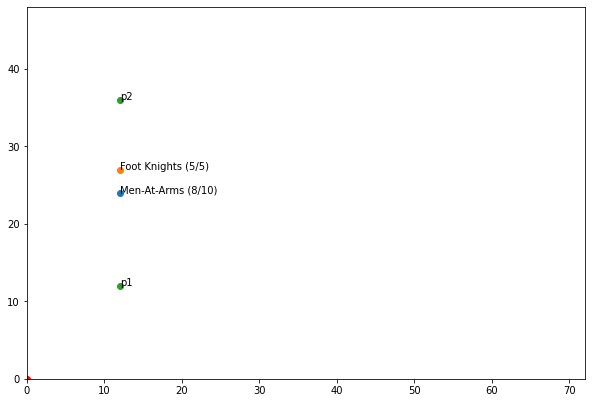

DEBUG:opr_logic:Starting Round 2
DEBUG:opr_logic:executing Unit(Men-At-Arms (8/10)(12.0,24.0), ('Charge', Unit(Foot Knights (5/5)(12.0,27.0))
DEBUG:opr_logic:Unit(Men-At-Arms a(8/10)(12.0,25.0) strikes Unit(Foot Knights (5/5)(12.0,27.0)
DEBUG:opr_logic:8 attacks
DEBUG:opr_logic:2 hits
DEBUG:opr_logic:1 wounds
DEBUG:opr_logic:Unit(Foot Knights (4/5)(12.0,27.0) strikes Unit(Men-At-Arms fa(8/10)(12.0,25.0)
DEBUG:opr_logic:4 attacks
DEBUG:opr_logic:4 hits
DEBUG:opr_logic:4 wounds
DEBUG:opr_logic:scores: a: 1, d: 4
DEBUG:opr_structs:Men-At-Arms doing morale test
DEBUG:opr_structs:Men-At-Arms failed morale test
DEBUG:opr_structs:Men-At-Arms routed!
DEBUG:opr_logic:executing Unit(Foot Knights f(4/5)(12.0,27.0), ('Rush', 12, -1.1842378929335003e-16)


Units:
[Unit(Men-At-Arms fa(8/10)(12.0,24.0), Unit(Foot Knights fa(5/5)(12.0,27.0)]
[Objective(12, 12, p1), Objective(12, 36, p2)]


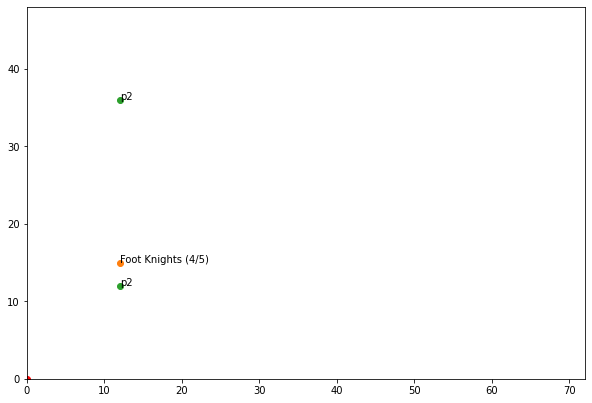

DEBUG:opr_logic:Starting Round 3
DEBUG:opr_ai:skipping <opr_structs.Player object at 0x7f983c16a220>
DEBUG:opr_logic:skipping <opr_structs.Player object at 0x7f983c16a220>
DEBUG:opr_logic:executing Unit(Foot Knights (4/5)(12.0,15.0), ('Hold', None)


Units:
[Unit(Men-At-Arms fa(0/10)(12.0,24.0), Unit(Foot Knights fa(4/5)(12.0,15.0)]
[Objective(12, 12, p2), Objective(12, 36, p2)]


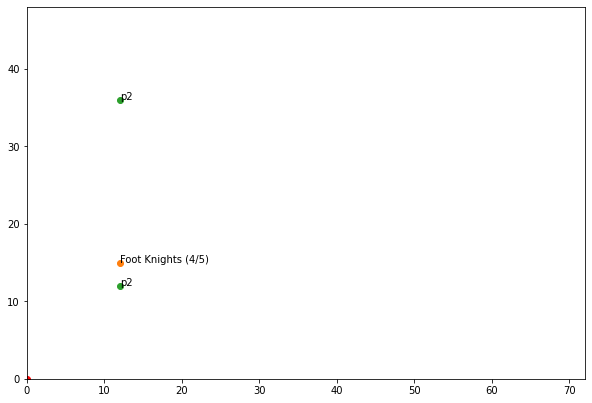

DEBUG:opr_logic:Starting Round 4
DEBUG:opr_ai:skipping <opr_structs.Player object at 0x7f983c16a220>
DEBUG:opr_logic:skipping <opr_structs.Player object at 0x7f983c16a220>
DEBUG:opr_logic:executing Unit(Foot Knights (4/5)(12.0,15.0), ('Hold', None)


Units:
[Unit(Men-At-Arms (0/10)(12.0,24.0), Unit(Foot Knights a(4/5)(12.0,15.0)]
[Objective(12, 12, p2), Objective(12, 36, p2)]


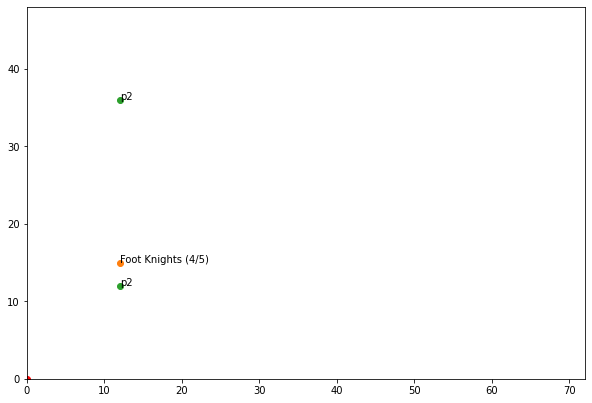

Units:
[Unit(Men-At-Arms (0/10)(12.0,24.0), Unit(Foot Knights a(4/5)(12.0,15.0)]
[Objective(12, 12, p2), Objective(12, 36, p2)]
0


In [24]:
realm_knights_c, warriors, peasants, giant_u
a = men_at_arms_10
b = foot_knights_5
with loggingcm(): print(full_1v1(copy.deepcopy(a), copy.deepcopy(b)))

In [25]:
# a_first = mc(lambda: full_1v1(copy.deepcopy(a), copy.deepcopy(b), 1), times=10000)
# b_first = 1 - mc(lambda: full_1v1(copy.deepcopy(b), copy.deepcopy(a), 0), times=10000)
# (a_first + b_first) / 2, a_first, b_first

With shooting/movement:

vs warriors:
realm_knights_c: (0.6409, 0.5333, 0.7484999999999999)
peasants: (0.255475, 0.12655, 0.38439999999999996)
giant_u: (0.71715, 0.7625, 0.6718)
rifle_dwarves: (0.020824999999999996, 0.00225, 0.03939999999999999)
rifle_dwarves_c: (0.20827500000000002, 0.09435, 0.32220000000000004)
xbow_dwarves: (0.020424999999999974, 0.00205, 0.038799999999999946)
xbow_dwarves_c: (0.233125, 0.15785, 0.3084)
drake_marksmen: (0.28435, 0.1708, 0.39790000000000003)
drake_marksmen_c: (0.8914249999999999, 0.7957, 0.98715)
bolt_thrower_u: (0.00559999999999998, 0.0058, 0.00539999999999996)
dwarven_cannon_u: (0.023475000000000024, 0.0363, 0.010650000000000048)

men_at_arms_10 vs foot_knights: (0.042475, 0.0326, 0.05235000000000001)
men_at_arms vs foot_knights: (0.565825, 0.6089, 0.52275)
men_at_arms_10 vs foot_knights_5: (0.74285, 0.73565, 0.75005)

In [26]:
from opr_ai import *

In [27]:
import random
def nvn_full(a, b, draw_value=0.5):
    random.shuffle(a)
    random.shuffle(b)
    # start units at 12x12 and increment by 6 for each
    for i, u in enumerate(a):
        u.y = 11.5
        u.x = 6 + i * 6
    
    for i, u in enumerate(b):
        u.y = 36.5
        u.x = 6 + i * 6
        
    p1 = Player("p1", a, (0, 12, 0, 72))
    p2 = Player("p2", b, (36, 48, 0, 72))
    
    p1.activation = basic_activation
    p2.activation = advanced_activation
    
    battle = Battle([p1, p2])
    obj_x = 6 + (len(a) - 1) * 3
    battle.objectives = [Objective(obj_x, 24),]
#     check_objectives(battle)
    
#     run_battle(battle)
    if logger.getEffectiveLevel() <= 10:
        plot_battle(battle)
    next_player = 0
    for i in range(4):
        next_player = do_round(battle, next_player)
        if logger.getEffectiveLevel() <= 10:
            plot_battle(battle)
            print("Units:")
            pprint(battle.all_units)
            pprint(battle.objectives)
        
    if battle.objectives[0].controller is None:
        return 0.5
    elif battle.objectives[0].controller == p1.name:
        return 1
    else:
        return 0

In [28]:
def copify(a):
    return [copy.deepcopy(u) for u in a]

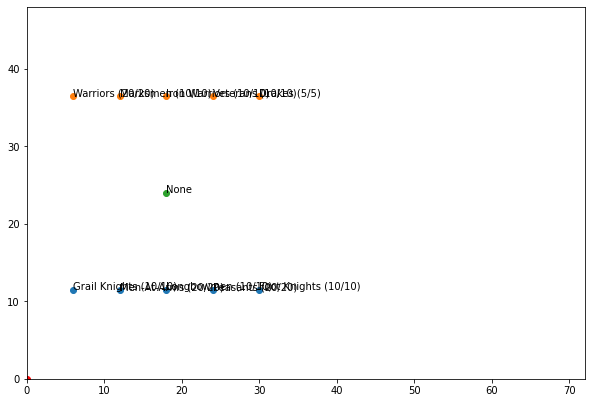

DEBUG:opr_logic:Starting Round 1
DEBUG:opr_logic:executing Unit(Grail Knights (10/10)(6.0,11.5), ('Rush', 16, -2.376599820878883)
DEBUG:opr_logic:executing Unit(Marksmen (10/10)(12.0,36.5), ('Advance', 4, -0.36097291827599803, Unit(Grail Knights a(10/10)(17.1,23.0))
DEBUG:opr_logic:Unit(Marksmen a(10/10)(13.4,32.8) shooting at Unit(Grail Knights a(10/10)(17.1,23.0)
DEBUG:opr_logic:10 attacks
DEBUG:opr_logic:4 hits
DEBUG:opr_logic:3 wounds
DEBUG:opr_logic:executing Unit(Longbowmen (10/10)(18.0,11.5), ('Advance', 6, 2.929059542141892, Unit(Marksmen a(10/10)(13.4,32.8))
DEBUG:opr_logic:Unit(Longbowmen a(10/10)(16.7,17.4) shooting at Unit(Marksmen a(10/10)(13.4,32.8)
DEBUG:opr_logic:10 attacks
DEBUG:opr_logic:3 hits
DEBUG:opr_logic:2 wounds
DEBUG:opr_logic:executing Unit(Warriors (20/20)(6.0,36.5), ('Rush', 8, -0.7649928327109102)
DEBUG:opr_logic:executing Unit(Men-At-Arms (20/20)(12.0,11.5), ('Rush', 12, -2.694072678432623)
DEBUG:opr_logic:executing Unit(Veterans (10/10)(24.0,36.5), ('Rus

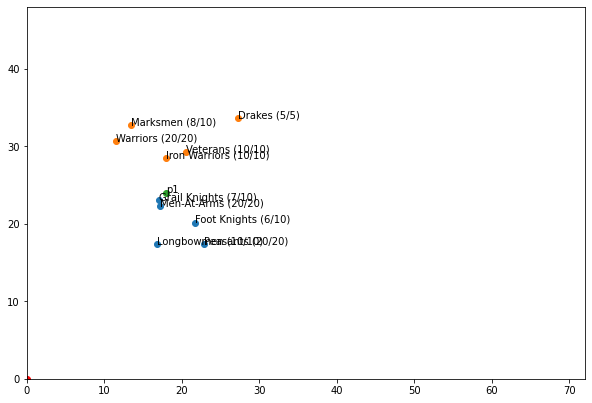

DEBUG:opr_logic:Starting Round 2
DEBUG:opr_logic:executing Unit(Grail Knights (7/10)(17.1,23.0), ('Charge', Unit(Iron Warriors (10/10)(18.0,28.5))
DEBUG:opr_logic:Unit(Grail Knights a(7/10)(17.7,26.5) strikes Unit(Iron Warriors (10/10)(18.0,28.5)
DEBUG:opr_logic:num impact: 7
DEBUG:opr_logic:14 attacks
DEBUG:opr_logic:11 hits
DEBUG:opr_logic:4 wounds
DEBUG:opr_logic:Unit(Iron Warriors (6/10)(18.0,28.5) strikes Unit(Grail Knights fa(7/10)(17.7,26.5)
DEBUG:opr_logic:6 attacks
DEBUG:opr_logic:5 hits
DEBUG:opr_logic:4 wounds
DEBUG:opr_logic:scores: a: 4, d: 5
DEBUG:opr_structs:Grail Knights doing morale test
DEBUG:opr_structs:rolling fearless test
DEBUG:opr_structs:Grail Knights failed morale test
DEBUG:opr_structs:Grail Knights routed!
DEBUG:opr_logic:executing Unit(Veterans (10/10)(20.5,29.3), ('Charge', Unit(Men-At-Arms (20/20)(17.2,22.3))
DEBUG:opr_logic:Unit(Veterans a(10/10)(18.1,24.1) strikes Unit(Men-At-Arms (20/20)(17.2,22.3)
DEBUG:opr_logic:10 attacks
DEBUG:opr_logic:7 hits
DEBUG

Units:
[Unit(Grail Knights a(7/10)(17.1,23.0),
 Unit(Men-At-Arms a(20/20)(17.2,22.3),
 Unit(Longbowmen a(10/10)(16.7,17.4),
 Unit(Peasants a(20/20)(22.9,17.4),
 Unit(Foot Knights a(6/10)(21.7,20.2),
 Unit(Warriors a(20/20)(11.5,30.7),
 Unit(Marksmen a(8/10)(13.4,32.8),
 Unit(Iron Warriors a(10/10)(18.0,28.5),
 Unit(Veterans a(10/10)(20.5,29.3),
 Unit(Drakes a(5/5)(27.2,33.6)]
[Objective(18, 24, p1)]


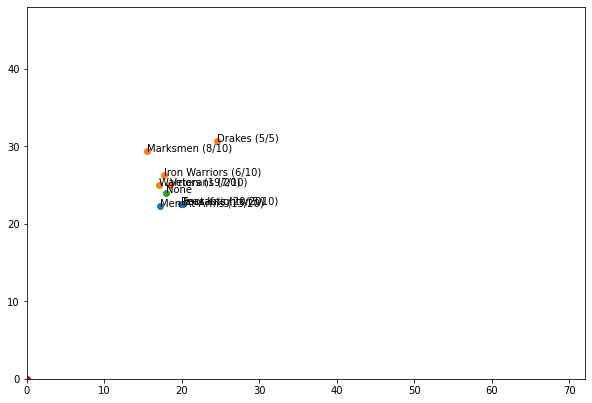

DEBUG:opr_logic:Starting Round 3
DEBUG:opr_logic:executing Unit(Men-At-Arms (13/20)(17.2,22.3), ('Charge', Unit(Warriors (19/20)(17.1,25.0))
DEBUG:opr_logic:Unit(Men-At-Arms a(13/20)(17.2,23.0) strikes Unit(Warriors (19/20)(17.1,25.0)
DEBUG:opr_logic:10 attacks
DEBUG:opr_logic:3 hits
DEBUG:opr_logic:3 wounds
DEBUG:opr_logic:Unit(Warriors (16/20)(17.1,25.0) strikes Unit(Men-At-Arms fa(13/20)(17.2,23.0)
DEBUG:opr_logic:10 attacks
DEBUG:opr_logic:5 hits
DEBUG:opr_logic:2 wounds
DEBUG:opr_logic:scores: a: 5, d: 5
DEBUG:opr_logic:executing Unit(Iron Warriors (6/10)(17.8,26.3), ('Charge', Unit(Peasants (20/20)(19.9,22.6))
DEBUG:opr_logic:Unit(Iron Warriors a(6/10)(18.9,24.3) strikes Unit(Peasants (20/20)(19.9,22.6)
DEBUG:opr_logic:6 attacks
DEBUG:opr_logic:4 hits
DEBUG:opr_logic:4 wounds
DEBUG:opr_logic:Unit(Peasants (16/20)(19.9,22.6) strikes Unit(Iron Warriors fa(6/10)(18.9,24.3)
DEBUG:opr_logic:10 attacks
DEBUG:opr_logic:2 hits
DEBUG:opr_logic:0 wounds
DEBUG:opr_logic:scores: a: 5, d: 3
D

Units:
[Unit(Grail Knights fa(0/10)(17.5,25.5),
 Unit(Men-At-Arms fa(13/20)(17.2,22.3),
 Unit(Longbowmen fsa(0/10)(17.4,23.3),
 Unit(Peasants a(20/20)(19.9,22.6),
 Unit(Foot Knights fa(5/10)(20.1,22.5),
 Unit(Warriors a(19/20)(17.1,25.0),
 Unit(Marksmen a(8/10)(15.5,29.3),
 Unit(Iron Warriors fa(6/10)(17.8,26.3),
 Unit(Veterans fsa(7/10)(18.5,25.0),
 Unit(Drakes a(5/5)(24.6,30.6)]
[Objective(18, 24, None)]


DEBUG:opr_logic:Unit(Drakes a(5/5)(22.7,27.1) shooting at Unit(Foot Knights fa(5/10)(20.1,22.5)
DEBUG:opr_logic:10 attacks
DEBUG:opr_logic:8 hits
DEBUG:opr_logic:5 wounds
DEBUG:opr_ai:skipping <opr_structs.Player object at 0x7f97e974a3a0>
DEBUG:opr_logic:skipping <opr_structs.Player object at 0x7f97e974a3a0>
DEBUG:opr_logic:executing Unit(Warriors f(16/20)(17.1,25.0), ('Charge', Unit(Men-At-Arms fa(11/20)(17.2,22.0))
DEBUG:opr_logic:Unit(Warriors fa(16/20)(17.1,24.0) strikes Unit(Men-At-Arms fa(11/20)(17.2,22.0)
DEBUG:opr_logic:10 attacks
DEBUG:opr_logic:2 hits
DEBUG:opr_logic:1 wounds
DEBUG:opr_logic:Unit(Men-At-Arms fa(10/20)(17.2,22.0) strikes Unit(Warriors fa(16/20)(17.1,24.0)
DEBUG:opr_logic:10 attacks
DEBUG:opr_logic:2 hits
DEBUG:opr_logic:1 wounds
DEBUG:opr_logic:scores: a: 4, d: 3
DEBUG:opr_structs:Men-At-Arms doing morale test
DEBUG:opr_structs:Men-At-Arms failed morale test
DEBUG:opr_structs:Men-At-Arms routed!


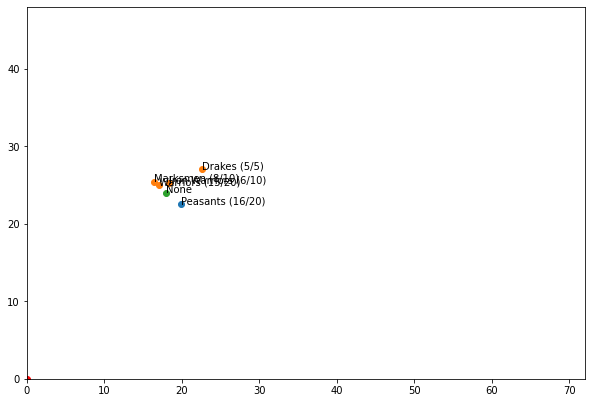

DEBUG:opr_logic:Starting Round 4
DEBUG:opr_logic:executing Unit(Peasants (16/20)(19.9,22.6), ('Advance', 0.9999999999999978, 2.6211415656454857, Unit(Iron Warriors (6/10)(18.4,25.2))
DEBUG:opr_logic:Unit(Peasants a(16/20)(19.4,23.5) shooting at Unit(Iron Warriors (6/10)(18.4,25.2)
DEBUG:opr_logic:16 attacks
DEBUG:opr_logic:4 hits
DEBUG:opr_logic:1 wounds
DEBUG:opr_structs:Iron Warriors doing ranged morale test
DEBUG:opr_logic:executing Unit(Marksmen (8/10)(16.4,25.5), ('Advance', 0.576672778954884, -0.9823635376209419, Unit(Peasants a(16/20)(19.4,23.5))
DEBUG:opr_logic:Unit(Marksmen a(8/10)(16.9,25.1) shooting at Unit(Peasants a(16/20)(19.4,23.5)
DEBUG:opr_logic:8 attacks
DEBUG:opr_logic:7 hits
DEBUG:opr_logic:7 wounds
DEBUG:opr_structs:Peasants doing ranged morale test
DEBUG:opr_structs:Peasants failed ranged morale test
DEBUG:opr_ai:skipping <opr_structs.Player object at 0x7f97e974a3a0>
DEBUG:opr_logic:skipping <opr_structs.Player object at 0x7f97e974a3a0>
DEBUG:opr_logic:executing U

Units:
[Unit(Grail Knights (0/10)(17.5,25.5),
 Unit(Men-At-Arms fa(0/20)(17.2,22.0),
 Unit(Longbowmen s(0/10)(17.4,23.3),
 Unit(Peasants fa(16/20)(19.9,22.6),
 Unit(Foot Knights fa(0/10)(20.1,22.5),
 Unit(Warriors fa(15/20)(17.1,25.0),
 Unit(Marksmen a(8/10)(16.4,25.5),
 Unit(Iron Warriors fa(6/10)(18.4,25.2),
 Unit(Veterans fs(0/10)(18.5,25.0),
 Unit(Drakes a(5/5)(22.7,27.1)]
[Objective(18, 24, None)]


DEBUG:opr_ai:skipping <opr_structs.Player object at 0x7f97e974a3a0>
DEBUG:opr_logic:skipping <opr_structs.Player object at 0x7f97e974a3a0>
DEBUG:opr_logic:executing Unit(Iron Warriors (5/10)(18.4,25.2), ('Rush', 3.7615527661001265, 0.3098548004970674)


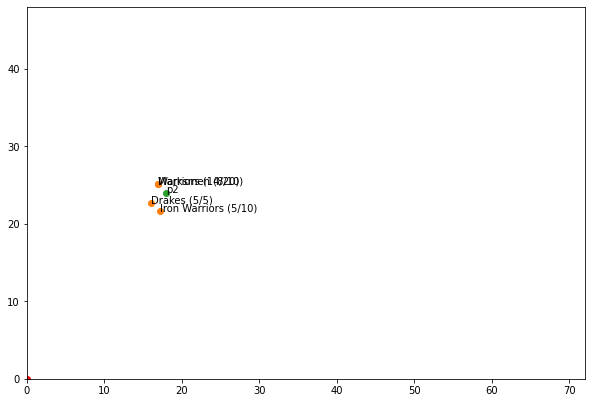

Units:
[Unit(Grail Knights (0/10)(17.5,25.5),
 Unit(Men-At-Arms (0/20)(17.2,22.0),
 Unit(Longbowmen s(0/10)(17.4,23.3),
 Unit(Peasants fsa(0/20)(19.4,23.5),
 Unit(Foot Knights (0/10)(20.1,22.5),
 Unit(Warriors fa(14/20)(16.9,25.1),
 Unit(Marksmen a(8/10)(16.9,25.1),
 Unit(Iron Warriors a(5/10)(17.2,21.6),
 Unit(Veterans s(0/10)(18.5,25.0),
 Unit(Drakes a(5/5)(16.0,22.7)]
[Objective(18, 24, p2)]
0


In [29]:
realm_knights_c, warriors, peasants, men_at_arms, foot_knights, longbowmen_10, grail_knights_c, ogres, giant_u,
a = [men_at_arms,longbowmen_10,peasants,grail_knights_c,foot_knights,]
b = [warriors,veterans,rifle_dwarves_c,iron_warriors,drake_marksmen,]
with loggingcm(): print(nvn_full(copify(a), copify(b)))

In [30]:
a_first = mc(lambda: nvn_full(copify(a), copify(b)), times=10000)
b_first = 1 - mc(lambda: nvn_full(copify(b), copify(a)), times=10000)
(a_first + b_first) / 2, a_first, b_first

 12%|████▍                                | 1213/10000 [00:05<00:42, 207.96it/s]


KeyboardInterrupt: 

[warriors,dwarven_cannon_u] vs [warriors,rifle_dwarves]: (0.438275, 0.5994, 0.27715)
[peasants,peasants,peasants,] vs [warriors,rifle_dwarves]: (0.625975, 0.6496, 0.6023499999999999)
vs hammerers: (0.5473250000000001, 0.98605, 0.10860000000000003)
warr warr vs warr rifle: (0.7553, 0.9376, 0.573)
warr iron vs warr rifle: (0.68145, 0.8696, 0.49329999999999996)
w w i vs w w r: (0.664575, 0.82365, 0.5055000000000001)
with extra 1/2: (0.63025, 0.77175, 0.48875)
full: (0.6228750000000001, 0.8871, 0.35865)
10v10 warrs vs 9war 1rifle: (0.5216000000000001, 0.5638, 0.47940000000000005)
10war vs 10rif: (0.925975, 0.92955, 0.9224)

10maa vs 10long: (0.8789, 0.8841, 0.8737)
10maa vs 8maa 1gn: (0.421075, 0.3941, 0.44804999999999995)
maa vs gn: (0.014049999999999986, 0.0117, 0.01639999999999997)
2maa vs gn: (0.41252500000000003, 0.3663, 0.45875)
3maa vs maa gn: (0.41252500000000003, 0.3663, 0.45875)
4maa vs 2maa gn: (0.420175, 0.42415, 0.4162)
6maa vs 3gn: (0.374525, 0.3669, 0.38215)
6long vs 3gn: (0.43085, 0.4337, 0.42800000000000005)
3/3 vs 3gn: (0.6158, 0.6534, 0.5782)
2long 4maa vs 3gn: (0.5430250000000001, 0.56105, 0.525)
4long 2maa vs 3gn: (0.6521, 0.71125, 0.59295)
5long 1maa vs 3gn: (0.6157, 0.67895, 0.55245)

03/01:
5long 1maa vs 3gn: (0.6456250000000001, 0.71725, 0.5740000000000001)
6maa vs 3gn: (0.78105, 0.7428, 0.8193)

1maa vs 1fn: (0.51435, 0.56155, 0.46714999999999995)
2v2: (0.48005, 0.4966, 0.4635)
4v4: (0.46497499999999997, 0.4678, 0.46214999999999995)
2maa vs 1maa 1fn: (0.491425, 0.49975, 0.4831)
2maa vs pes hfn: (0.54125, 0.5625, 0.52)
berserkers vs hfn: (0.68565, 0.9486, 0.42269999999999996)
berserkers vs maa: (0.758475, 0.89395, 0.623)
ogres vs 2maa: (0.4323, 0.43245, 0.43215000000000003)
ogres vs 1maa 1pes: (0.38575000000000004, 0.37755, 0.39395)
2long 1maa vs 2ogres: (0.237925, 0.2396, 0.23624999999999996)

men_at_arms,men_at_arms,peasants,grail_knights_c,foot_knights, vs 
halb_warrs,warriors,xbow_dwarves,iron_warriors,drake_marksmen,: (0.32582500000000003, 0.3404, 0.31125)
vs warriors,veterans,rifle_dwarves_c,iron_warriors,drake_marksmen, : (0.24382500000000001, 0.24675, 0.2409)

men_at_arms,longbowmen_10,peasants,grail_knights_c,foot_knights, vs
warriors,veterans,rifle_dwarves_c,iron_warriors,drake_marksmen : (0.17572500000000002, 0.1784, 0.17305000000000004)

In [ ]:
90*4

In [ ]:
def run_nvn(a, b):
    a_first = mc(lambda: nvn_full(copify(a), copify(b)), times=10000)
    b_first = 1 - mc(lambda: nvn_full(copify(b), copify(a)), times=10000)
    return ((a_first + b_first) / 2, a_first, b_first)

In [ ]:
# armies for tournament stuff. the specific unit first, then the filler
armies = [
    [men_at_arms,men_at_arms,men_at_arms,],  # 390
    [grail_knights_c,men_at_arms,], # 380
    [longbowmen_10,longbowmen_10,men_at_arms,], # 390
    [foot_knights,foot_knights,peasants,], # 370
#     [ogres,men_at_arms,], # 340
    [ogres,peasants,peasants,], # 390
    [giant_u,men_at_arms,], # 390
    [peasants,peasants,peasants,peasants,], # 360
]

In [ ]:
import itertools
results = {}
for a, b in itertools.combinations(armies, 2):
    result = run_nvn(a, b)
    print(f"{a[0].name} vs {b[0].name}: {result}")
    results[(a[0].name, b[0].name)] = result

Men-At-Arms vs Grail Knights: (0.50785, 0.4008, 0.6149)
Men-At-Arms vs Longbowmen: (0.5867, 0.57765, 0.59575)
Men-At-Arms vs Foot Knights: (0.48187499999999994, 0.48645, 0.47729999999999995)
Men-At-Arms vs Ogres: (0.43825000000000003, 0.42685, 0.44965)
Men-At-Arms vs Giant: (0.631075, 0.62675, 0.6354)
Men-At-Arms vs Peasants: (0.6925250000000001, 0.6832, 0.70185)
Grail Knights vs Longbowmen: (0.634575, 0.5842, 0.68495)
Grail Knights vs Foot Knights: (0.45175, 0.27695, 0.6265499999999999)
Grail Knights vs Ogres: (0.23829999999999998, 0.15775, 0.31884999999999997)
Grail Knights vs Giant: (0.6718, 0.66855, 0.6750499999999999)
Grail Knights vs Peasants: (0.305825, 0.31505, 0.2966)
Longbowmen vs Foot Knights: (0.45155, 0.45185, 0.45125000000000004)
Longbowmen vs Ogres: (0.38355000000000006, 0.3683, 0.39880000000000004)
Longbowmen vs Giant: (0.542925, 0.55585, 0.53)
Longbowmen vs Peasants: (0.549725, 0.5522, 0.54725)
Foot Knights vs Ogres: (0.388575, 0.3793, 0.39785000000000004)
Foot Knights vs Giant: (0.6156250000000001, 0.61, 0.6212500000000001)
Foot Knights vs Peasants: (0.399675, 0.3874, 0.41195000000000004)
Ogres vs Giant: (0.700825, 0.6848, 0.71685)
Ogres vs Peasants: (0.5965499999999999, 0.6052, 0.5879)
Giant vs Peasants: (0.41805, 0.43655, 0.39954999999999996)

Men at arms: bad against knights, ogres, average against longbowmen, heavy inf, good against giants, peasants
Grail knights: bad against peasants, ogres, average vs foot knights, good vs giant, longbowmen, infantry
Longbowmen: bad vs infantry, ogres, knights average vs heavy inf, giant, peasants

In [ ]:
260*2

In [ ]:
armies = [
    [men_at_arms,men_at_arms,men_at_arms,men_at_arms,],  # 520
    [grail_knights_c,grail_knights_c,], # 500
#     [longbowmen_10,longbowmen_10,men_at_arms,], # 390
    [foot_knights,foot_knights,foot_knights,peasants,], # 510
#     [ogres,men_at_arms,], # 340
    [ogres,ogres,peasants,], # 390
    [giant_u,giant_u,], # 520
#     [peasants,peasants,peasants,peasants,], # 360
]

In [ ]:
a = [longbowmen_10,longbowmen_10,longbowmen_10,men_at_arms,]
for b in armies:
    result = run_nvn(a, b)
    print(f"{a[0].name} vs {b[0].name}: {result}")
    results[(a[0].name, b[0].name)] = result